In [0]:
import numpy as np
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings



In [0]:
def estimate_coef(x,y):
  #number of observations/points
  n = np.size(x)
  #mean of x and y veector
  m_x, m_y = np.mean(x), np.mean(y)
  
  #cacl cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  
  # calc-ing regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
  return (b_0, b_1)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Reading dataset
engine='python'
link="/content/housing.csv"
#link="https://drive.google.com/open?id=1tXMmO73O01dAhrW7s7TvRtmzmwTi9CZ5"
dataset = pandas.read_csv(link)
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [0]:
print(dataset.describe())

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [0]:
def get_price(x):
  b , k = estimate_coef(dataset['LSTAT'], dataset['MEDV'])

  p = (k*x + b)
  return p

In [8]:
get_price(3)

630861.3480863376

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

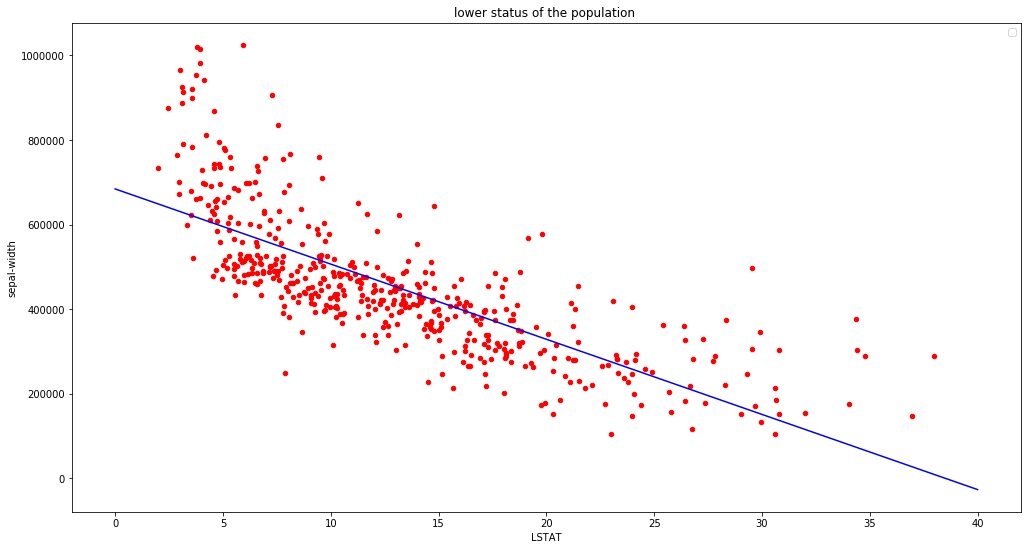

In [12]:
#Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
#warnings.simplefilter("ignore")#Supress any warning
plt.figure()
#fig, ax = plt.plot(1, size=(17, 9))
fig,ax=plt.subplots(1, 1,figsize=(17, 9))
dataset.plot(x="LSTAT",y="MEDV",kind="scatter",ax=ax,sharex=False,sharey=False,label="",color='r')
ax.set(title='lower status of the population ', ylabel='sepal-width')
#ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax.legend()
#ax[1].legend()

x = np.linspace(0,40,500)
b , k = estimate_coef(dataset['LSTAT'], dataset['MEDV'])
y = k*x + b
plt.plot(x, y, 'b', label='line')

plt.show()
plt.close()

# we can see that  there are some petals which are smaller than rest of petal.
#Let's examine them